In diesem Skript wird nicht auf ein sequentielles Model (Sequential) gesetzt, sondern auf ein Model

In [57]:
import os # Arbeiten mit Pfaden
import numpy as np
from typing import Tuple

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D

import matplotlib.pyplot as plt

In [58]:
LOGS_DIR = os.path.abspath('C:/Selbststudium/Udemy/Udemy_Tensorflow/logs')
if not os.path.exists(LOGS_DIR):
    os.mkdir(LOGS_DIR)
MODEL_LOG_DIR = os.path.join(LOGS_DIR, 'mnist_cnn4')

In [59]:
def get_dataset(img_shape: int, num_classes: int) -> Tuple[Tuple[np.ndarray, np.ndarray], Tuple[np.ndarray, np.ndarray]]:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    x_train = x_train.astype(np.float32)
    x_test  = x_test.astype(np.float32)
    
    y_train = to_categorical(y_train, num_classes=num_classes, dtype=np.float32)
    y_test  = to_categorical(y_test, num_classes=num_classes, dtype=np.float32)

    return (x_train, y_train), (x_test, y_test)

In [60]:
def build_model(img_shape: Tuple[int, int, int], num_classes: int) -> Model:
    input_img = Input(shape=img_shape)

    x = Conv2D(filters=32, kernel_size=3, padding='same')(input_img)
    x = Activation('relu')(x)
    x = Conv2D(filters=32, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Flatten()(x)
    x = Dense(units=num_classes)(x)
    y_pred = Activation('softmax')(x)

    # Jetzt muss noch ein Modell Objekt mit eben obiger Struktur erstellt werden
    model = Model(
        inputs = [input_img],
        outputs = [y_pred]
    )

    model.summary()

    return model

In [66]:
# Visualisierung der Filter
def plot_filters(model: Model) -> None:
    first_conv_layer = model.layers[1]
    layer_weights = first_conv_layer.get_weights()
    kernels = layer_weights[0]

    num_filters = kernels.shape[3]
    subplot_grid = (num_filters // 4, 4)

    fig, ax = plt.subplots(subplot_grid[0], subplot_grid[1], figsize = (20, 20))
    ax = ax.reshape(num_filters)

    for filter_idx in range(num_filters):
        ax[filter_idx].imshow(kernels[:, :, 0, filter_idx], cmap = 'gray')

    ax = ax.reshape(subplot_grid)
    fig.subplots_adjust(hspace=0.5)
    plt.show()

In [62]:
img_shape = (28, 28, 1) # Bild hat 28*28 Pixel
num_classes = 10 # 10 Ziffern möglich
    
(x_train, y_train), (x_test, y_test) = get_dataset(img_shape, num_classes)
  
model = build_model(img_shape, num_classes)

opt = Adam(learning_rate=0.001)

model.compile(
    loss='categorical_crossentropy', # wird bei Kategorie-Problemen mit mehr als 2 Klassen genommen
    optimizer=opt,
    metrics=['accuracy']
)

tb_callback = TensorBoard(
    log_dir=MODEL_LOG_DIR,
    histogram_freq=1,
    write_graph=True
)

model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=256,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[tb_callback]
)

scores = model.evaluate(
    x=x_test, 
    y=y_test, 
    verbose=0
)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_33 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_34 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                           

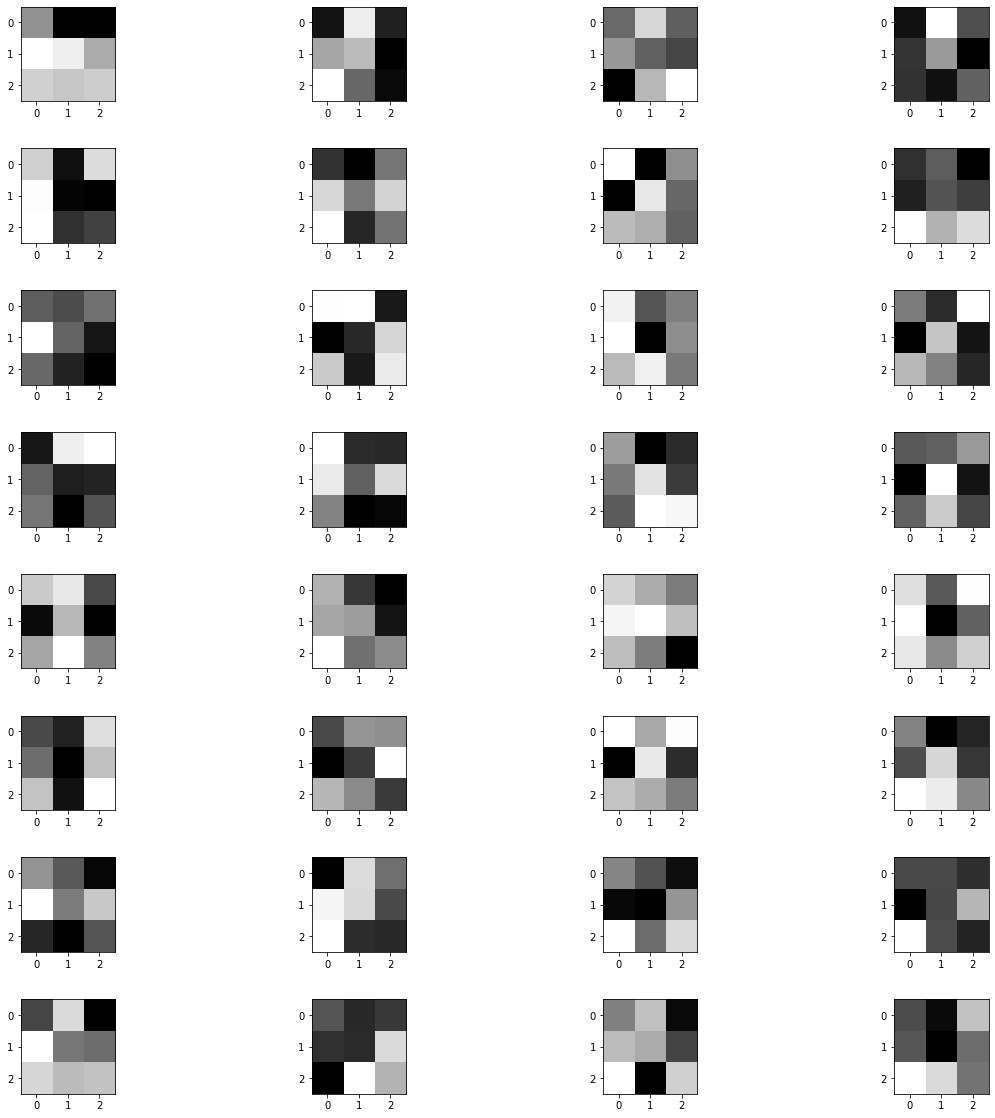

In [67]:
plot_filters(model)